## Ex 2.1:
In "epsilon-greedy action selection, for the case of two actions and " =0.5, what is the probability that the greedy action is selected? 

As when taking random actions, we might actually select optimal action as well. Therefore, the probability is 0.5 + 0.5 * 0.5  = 0.75

## Ex 2.2
Consider a k-armed bandit problem with k = 4 actions, denoted 1, 2, 3, and 4. Consider applying to this problem a bandit algorithm using "epsilon-greedy action selection, sample-average action-value estimates, and initial estimates of Q1(a) = 0, for all a. Suppose the initial sequence of actions and rewards is A1 = 1, R1 = -1, A2 = 2, R2 = 1, A3 = 2, R3 = -2, A4 = 2, R4 = 2, A5 = 3, R5 = 0. On some of these time steps the " case may have occurred, causing an action to be selected at random. On which time steps did this definitely occur? On which time steps could this possibly have occurred?

Step 1: A1 = 1, R1 = -1: Random selection/greedy with breaking ties among (1, 2, 3, 4). Greedy action is (2,3,4). (Maybe)

Step 2: A2 = 2, R2 = 1:  Possible greedy/ random selection among (2, 3, 4). Greedy aciton is (2) (Maybe)

Step 3: A3 = 2, R3 = -2: Possible greedy/random. Greedy action is (2) (Maybe)

Step 4: A4 = 2, R4 = 2: Possible greedy/random. Greedy action is (2) (Maybe)

Step 5: A5 = 3, R5 = 0: Random because greedy action is (2) (Yes)

## Ex 2.3
In the comparison shown in Figure 2.2, which method will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be? Express your answer quantitatively.

epsilon-greedy with epsilon = 0.01 will perform best.
Best cumulative reward = (1-epsilon + epsilon/number_of_possible_action)*(q*) + epsilon/ number_of_possible_action * average of other non-optimal actions

Best probability of selecting the best action: 1 - epsilon + epsilon / (number of possible action)

## Ex 2.4
If the step-size parameters, alpha_n, are not constant, then the estimate Qn is a weighted average of previously received rewards with a weighting different from that given by (2.6). What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?

$Q_{n+1} = Q_1 \prod_{i=1}^{n}(1-\alpha_i) + \sum_{i=1}^n R_i \alpha_i \prod_{j=i}^{n-1}(1-\alpha_{j+1})$
Weighting for $R_i$: $\alpha_i \prod_{j=i}^{n-1}(1 - \alpha_{j+1})$ with $i \leq n - 1$
Weighting for $R_n$: $\alpha_n$

## Ex 2.6
Mysterious Spikes The results shown in Figure 2.3 should be quite reliable because they are averages over 2000 individual, randomly chosen 10-armed bandit tasks. Why, then, are there oscillations and spikes in the early part of the curve for the optimistic method? In other words, what might make this method perform particularly better or worse, on average, on particular early steps?

As there is an optimistic initial values, the agent will try all possible actions at the beginning and it will eventually select the optimal actions. Selecting the optimal action will return high reward values, making the agent selects the optimal actions more than other actions. It only ends when the estimate value of actions gradually converges to the true values.

## Ex 2.7
Unbiased Constant-Step-Size Trick:

## Ex 2.8
UCB Spikes: By using UCB, at first, all actions will be tried. Since there are a total of 10 arms or k=10, therefore, at the first 10 steps, the agent will choose each lever once. At the 11th step, the agent chooses the optimal one based on the estimates of the first 10 actions. It will be likely to choose a pretty good action which creates the spike in the reward curve. After this, the agent will possibly chooses another action that yields smaller rewards which makes the curve goes down on the subsequent steps.

## Ex 2.9
Show that in the case of two actions, the soft-max distribution is the same as that given by the logistic, or sigmoid, function often used in statistics and artificial neural networks.

For action 1 (similar to action 2), you can convert from softmax -> sigmoid:

$p\{A_t = a_1\} =  \frac{e^{H_t(a_1)}}{e^{H_t(a_1)} + e^{H_t(a_2)}} = \frac{1}{1 + e^{-(H_t(a_1) - H_t(a_2))}}$

## Ex 2.10
If we are not told which case we are facing then the value of each action is the same since Q(action1) = 0.1 x 0.5 + 0.9 x 0.5 = Q(action2) = 0.2 x 0.5 + 0.8 x 0.5. Therefore, in this case we can keep selecting one action. If we know which case we are facing, then if we are in case A, we select action 2 and in case B, we selection action 1. The expected reward will be 0.2 x 0.5 + 0.9 x 0.5 = 0.55 which is higher than previously.

## Ex 2.5
(programming) Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q^*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q^*(a)$ on each step). Prepare plots like Fig 2.2 for an action-value method using a constant step-size parameter $\alpha=0.1$. Use $\epsilon=0.1$ and longer runs, say of 10,000 steps.

100%|██████████| 200/200 [00:37<00:00,  5.36it/s]
<class 'numpy.ndarray'> (1, 10000)


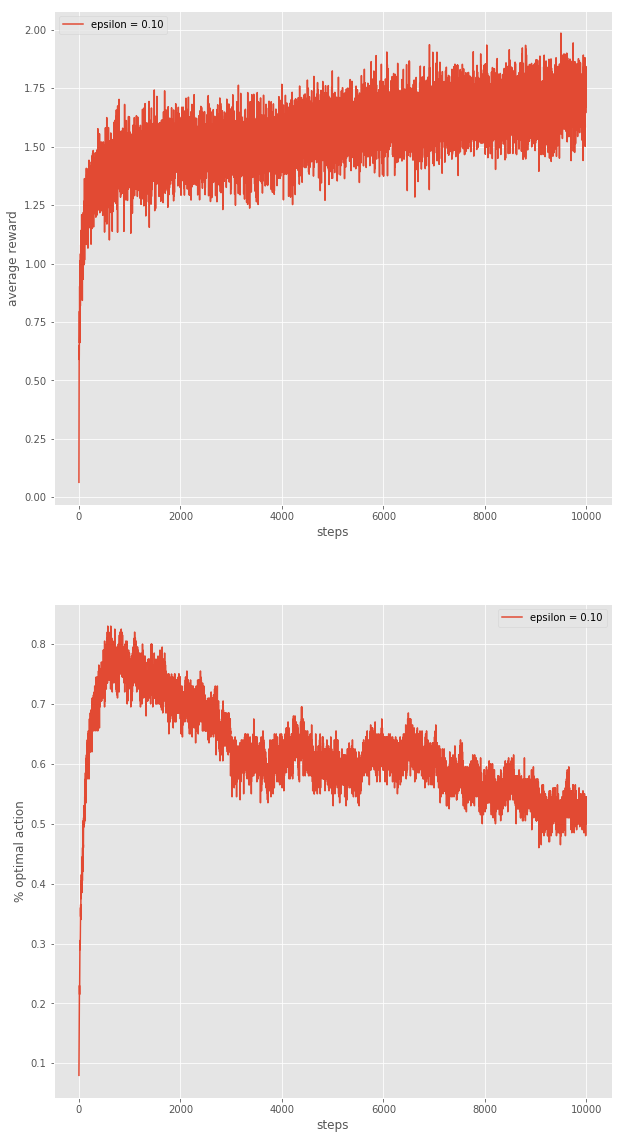

In [5]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Tian Jun(tianjun.cpp@gmail.com)                                #
# 2016 Artem Oboturov(oboturov@gmail.com)                             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

# A modified version based on the code at https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter02/ten_armed_testbed.py

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange

plt.style.use('ggplot')

class Bandit:
    # @k_arm: # of arms
    # @epsilon: probability for exploration in epsilon-greedy algorithm
    # @initial: initial estimation for each action
    # @step_size: constant step size for updating estimations
    # @sample_averages: if True, use sample averages to update estimations instead of constant step size
    # @UCB_param: if not None, use UCB algorithm to select action
    # @gradient: if True, use gradient based bandit algorithm
    # @gradient_baseline: if True, use average reward as baseline for gradient based bandit algorithm
    def __init__(self, k_arm=10, epsilon=0., initial=0., step_size=0.1, sample_averages=False, UCB_param=None,
                 gradient=False, gradient_baseline=False, true_reward=0.):
        self.k = k_arm
        self.step_size = step_size
        self.sample_averages = sample_averages
        self.indices = np.arange(self.k)
        self.time = 0
        self.UCB_param = UCB_param
        self.gradient = gradient
        self.gradient_baseline = gradient_baseline
        self.average_reward = 0
        self.true_reward = true_reward
        self.epsilon = epsilon
        self.initial = initial

    def reset(self):
        # real reward for each action
        self.q_true = np.random.randn(self.k) + self.true_reward

        # estimation for each action
        self.q_estimation = np.zeros(self.k) + self.initial

        # # of chosen times for each action
        self.action_count = np.zeros(self.k)

        self.best_action = np.argmax(self.q_true)

        self.time = 0

    # get an action for this bandit
    def act(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.indices)

        if self.UCB_param is not None:
            UCB_estimation = self.q_estimation + \
                self.UCB_param * np.sqrt(np.log(self.time + 1) / (self.action_count + 1e-5))
            q_best = np.max(UCB_estimation)
            return np.random.choice(np.where(UCB_estimation == q_best)[0])

        if self.gradient:
            exp_est = np.exp(self.q_estimation)
            self.action_prob = exp_est / np.sum(exp_est)
            return np.random.choice(self.indices, p=self.action_prob)

        q_best = np.max(self.q_estimation)
        return np.random.choice(np.where(self.q_estimation == q_best)[0])

    # take an action, update estimation for this action
    def step(self, action, stationary=True):
        # In case of non-stationary
        if (not stationary):
            self.q_true += 0.01 * np.random.randn(self.k)
            self.best_action = np.argmax(self.q_true)
        
        # generate the reward under N(real reward, 1)
        reward = np.random.randn() + self.q_true[action]
        self.time += 1
        self.action_count[action] += 1
        self.average_reward += (reward - self.average_reward) / self.time

        if self.sample_averages:
            # update estimation using sample averages
            self.q_estimation[action] += (reward - self.q_estimation[action]) / self.action_count[action]
        elif self.gradient:
            one_hot = np.zeros(self.k)
            one_hot[action] = 1
            if self.gradient_baseline:
                baseline = self.average_reward
            else:
                baseline = 0
            self.q_estimation += self.step_size * (reward - baseline) * (one_hot - self.action_prob)
        else:
            # update estimation with constant step size
            self.q_estimation[action] += self.step_size * (reward - self.q_estimation[action])
        return reward


def simulate(runs, time, bandits):
    rewards = np.zeros((len(bandits), runs, time))
    best_action_counts = np.zeros(rewards.shape)
    for i, bandit in enumerate(bandits):
        for r in trange(runs):
            bandit.reset()
            for t in range(time):
                action = bandit.act()
                reward = bandit.step(action, stationary=False)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1
    mean_best_action_counts = best_action_counts.mean(axis=1)
    mean_rewards = rewards.mean(axis=1)
    return mean_best_action_counts, mean_rewards


def figure_2_2(runs=200, time=10000):
    eps = 0.1
    epsilons = [eps]
    bandits = [Bandit(epsilon=eps, sample_averages=True)]
    best_action_counts, rewards = simulate(runs, time, bandits)

    plt.figure(figsize=(10, 20))
    print(type(rewards), rewards.shape)

    plt.subplot(2, 1, 1)
    for eps, rewards in zip(epsilons, rewards):
        plt.plot(rewards, label='epsilon = %.02f' % (eps) )
    plt.xlabel('steps')
    plt.ylabel('average reward')
    plt.legend()

    plt.subplot(2, 1, 2)
    for eps, best_action_counts in zip(epsilons, best_action_counts):
        plt.plot(best_action_counts, label='epsilon = %.02f' % (eps))
    plt.xlabel('steps')
    plt.ylabel('% optimal action')
    plt.legend()

if __name__ == '__main__':
    figure_2_2()
